/var/folders/2j/q_s66n_57s72jcslqxv41w440000gn/T/ipykernel_72829/2743213604.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2j/q_s66n_57s72jcslqxv41w440000gn/T/ipykernel_72829/2743213604.py:46: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(
/var/folders/2j/q_s66n_57s72jcslqxv41w440000gn/T/ipykernel_72829/2743213604.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2j/q_s66n_57s72jcslqxv41w440000gn/T/ipykernel_72829/2743213604.py:46: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become

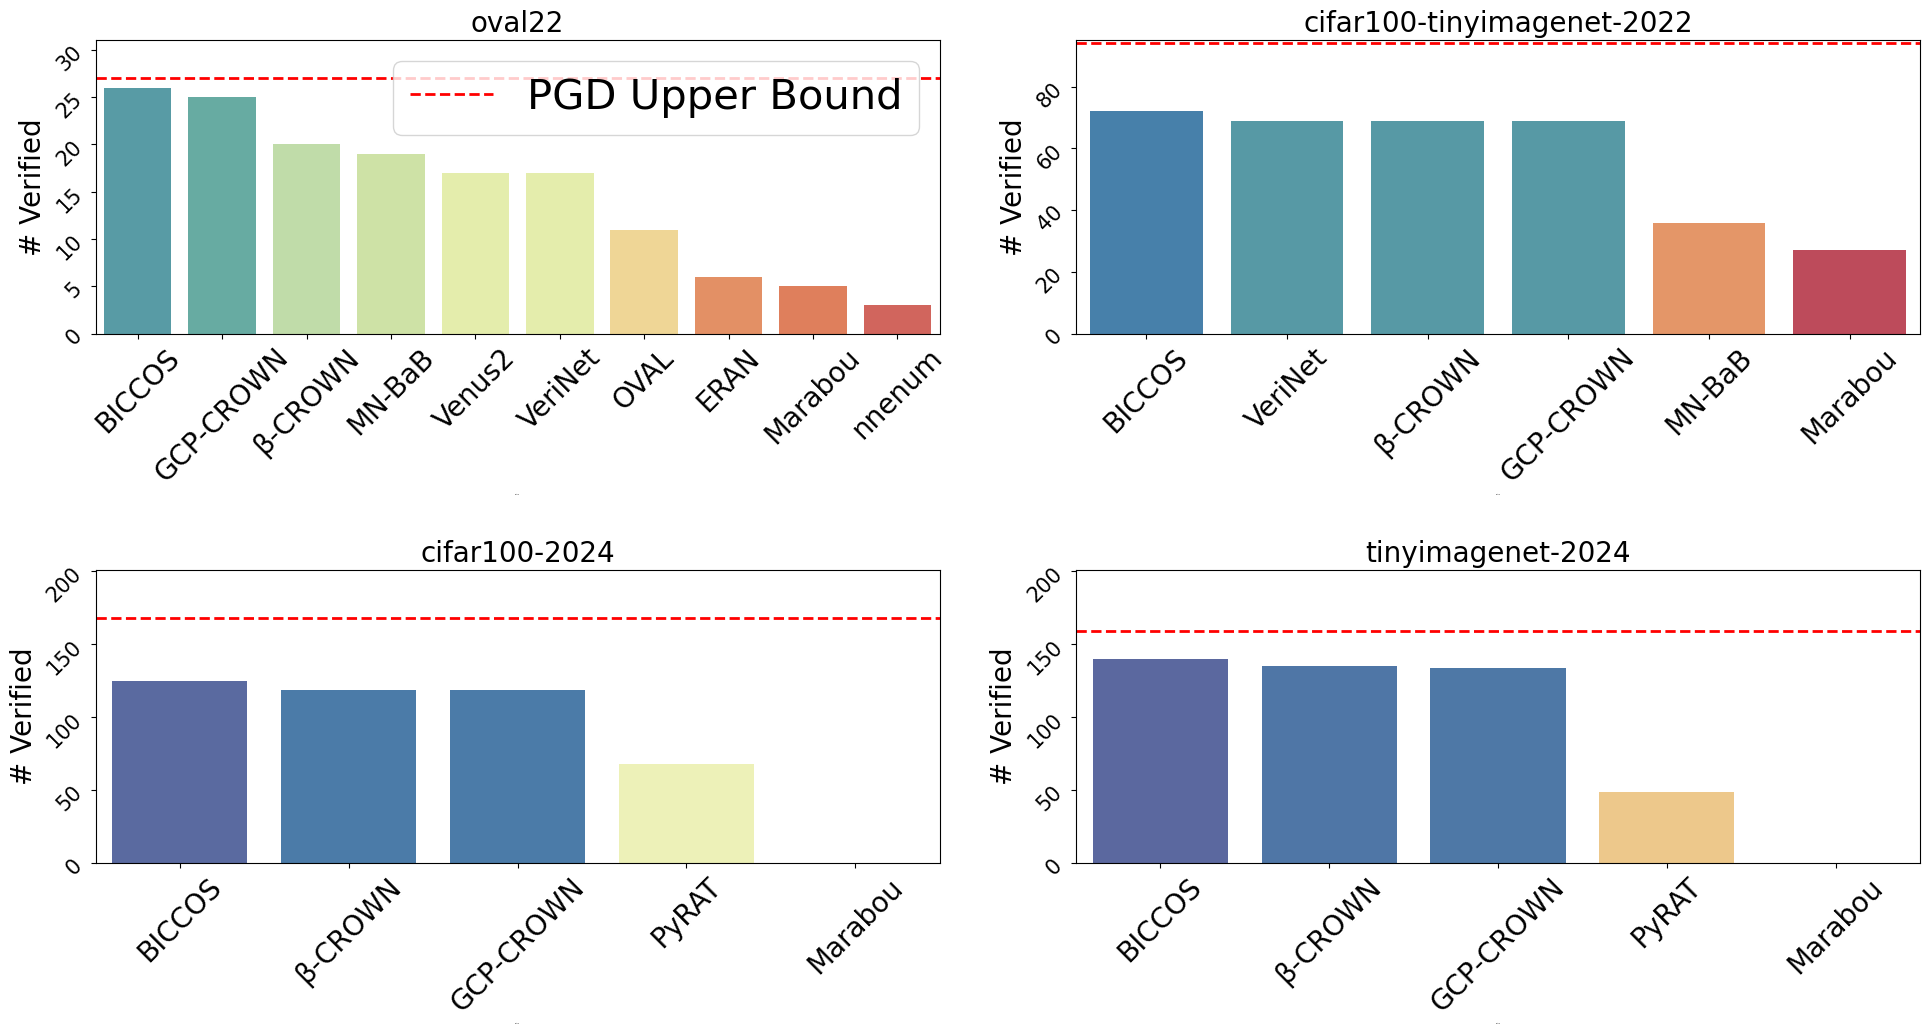

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    'Method': [
        'nnenum', 'Marabou', 'ERAN', 'OVAL', 'Venus2', 
        'VeriNet', 'MN-BaB', 'PyRAT', 'β-CROWN', 
        'GCP-CROWN', 'BICCOS'
    ],
    'oval22': [3, 5, 6, 11, 17, 17, 19, None, 20, 25, 26],
    'cifar100-tinyimagenet-2022': [None, 27, None, None, None, 69, 36, None, 69, 69, 72],
    'cifar100-2024': [None, 0, None, None, None, None, None, 68, 119, 119, 125],
    'tinyimagenet-2024': [None, 0, None, None, None, None, None, 49, 135, 134, 140]
}

# Define PGD upper bound values
pgd_upper_bound = [27, 94, 168, 159]
n_instances = [30, 94, 200, 200]

# Create DataFrame
df = pd.DataFrame(data)

# Set global font size
plt.rcParams.update({'font.size': 30})

# Plot setup
benchmarks = ['oval22', 'cifar100-tinyimagenet-2022', 'cifar100-2024', 'tinyimagenet-2024']
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharey=False)

# Plot each benchmark in a separate subplot with sorted data and color gradient
for i, benchmark in enumerate(benchmarks):
    # Access the subplot in a 2x2 grid
    ax = axes[i // 2, i % 2]
    
    # Sort the data by '# Verified' for the current benchmark and drop NaNs
    benchmark_data = df[['Method', benchmark]].dropna().sort_values(by=benchmark, ascending=False)
    benchmark_data.columns = ['Method', '# Verified']  # Rename for consistency
    
    # Normalize values to exaggerate color contrast
    norm = plt.Normalize(benchmark_data['# Verified'].min() - 5, benchmark_data['# Verified'].max() + 5)
    colors = plt.cm.Spectral(norm(benchmark_data['# Verified']))

    # Draw the bar plot
    sns.barplot(
        data=benchmark_data,
        x='Method',
        y='# Verified',
        ax=ax,
        palette=colors
    )
    
    # Add PGD upper bound line
    if i == 0:  # Add the label only to the first subplot
        ax.axhline(pgd_upper_bound[i], color='red', linestyle='--', linewidth=2, label='PGD Upper Bound')
    else:
        ax.axhline(pgd_upper_bound[i], color='red', linestyle='--', linewidth=2)
    
    # Set title, labels, and limits
    ax.set_ylim(0, n_instances[i]+1)
    ax.set_title(benchmark, fontsize=20)
    ax.tick_params(axis='x', rotation=45, labelsize=20)
    ax.tick_params(axis='y', rotation=45, labelsize=15)
    ax.set_xlabel('Method', fontsize=1)
    ax.set_ylabel('# Verified', fontsize=20)

# Display the legend only once
axes[0, 0].legend()

# Overall figure settings
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

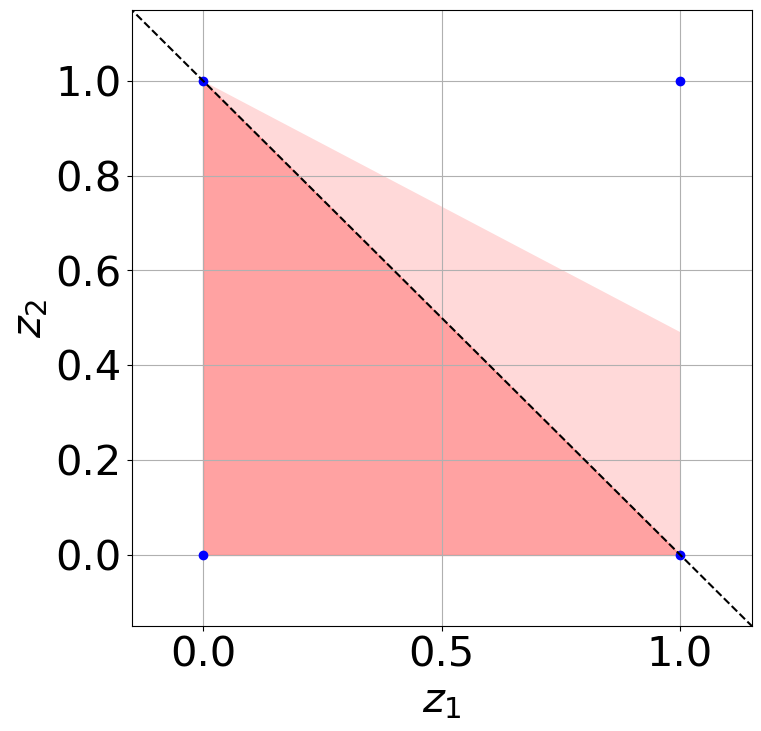

In [4]:
# Adjusting the code to make the right part of the cut region's color lighter
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Define the grid points
x = np.arange(0, 2, 1)
y = np.arange(0, 2, 1)
x_grid, y_grid = np.meshgrid(x, y)

# Define the polygon vertices and the lighter region vertices
polygon_vertices = np.array([[0, 1], [0, 0], [1, 0]])
lighter_region_vertices = np.array([[0, 1], [0, 0], [1, 0], [1, 1], [1, 0.47]])
#lighter_region_digonal = np.array([[0.52, 1.47], [1, 1], [1, 1.17]])

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot grid points
ax.plot(x_grid, y_grid, 'bo')  # blue points

# Fill the main polygon area
polygon = Polygon(polygon_vertices, closed=True, facecolor='red', alpha=0.25, edgecolor='red')
ax.add_patch(polygon)

# Fill the lighter region within the polygon
lighter_region = Polygon(lighter_region_vertices, closed=True, facecolor='red', alpha=0.15, edgecolor='none')
ax.add_patch(lighter_region)

# Fill the lighter region outside the polygon
#lighter_region = Polygon(lighter_region_digonal, closed=True, facecolor='red', alpha=0.25, edgecolor='none')
#ax.add_patch(lighter_region)

# Draw the dashed lines
ax.plot([-0.25, 1.25], [1.25, -0.25], 'k--')  # Diagonal dashed line
#ax.plot([1, 1], [-0.25, 2], 'k--')  # Vertical dashed line

# Label axes
ax.set_xlabel('$z_1$', fontsize=30)
ax.set_ylabel('$z_2$', fontsize=30)

# Set limits for a similar view
ax.set_xlim(-0.15, 1.15)
ax.set_ylim(-0.15, 1.15)

# Show plot
plt.grid(True)
plt.show()